In [1]:
# if it is not already installed
#!pip install pandas

In [2]:
#Loading useful libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [3]:
# Reading the csv file from its location on your computer

online_retail=pd.read_csv("/Users/tuminiabbeyordu/Desktop/Bootcamp Materials/Python Course/python data.csv", encoding = 'ISO-8859-1')

In [4]:
# Display the first few rows of the DataFrame 
#Put a number in the bracket to return that number of rows. Leaving it empty returns first 5

online_retail.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [5]:
# Display the last few rows of the DataFrame 

online_retail.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/2011 12:50,4.95,12680.0,France


# Investigating and Cleaning Data

### Getting insight into dataset provided

In [6]:
# Find the number of rows and columns in the dataset

online_retail.shape

(541909, 8)

In [7]:
# Find data types of each column and the number of non-null values

online_retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [8]:
# count the occurrences of each data type present in the columns of the DataFrame

online_retail.dtypes.value_counts()

object     5
float64    2
int64      1
dtype: int64

In [9]:
# Return the number of unique values for each column in the DataFrame

online_retail.nunique()

InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64

### Finding missing values in our data

In [10]:
# Find columns where missing values exist

online_retail.isna().any()

InvoiceNo      False
StockCode      False
Description     True
Quantity       False
InvoiceDate    False
UnitPrice      False
CustomerID      True
Country        False
dtype: bool

In [11]:
# find the number of missing values in each column and sort in descending order

online_retail.isna().sum().sort_values(ascending=False)

CustomerID     135080
Description      1454
InvoiceNo           0
StockCode           0
Quantity            0
InvoiceDate         0
UnitPrice           0
Country             0
dtype: int64

In [12]:
#looking into data with missing values
# Filter the DataFrame to only include rows where at least one value is missing (NaN) across any column

online_retail[online_retail.isna().any(axis=1)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/2010 11:52,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/2010 14:32,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/2010 14:32,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,12/1/2010 14:32,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/2010 14:32,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,12/9/2011 10:26,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,12/9/2011 10:26,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,12/9/2011 10:26,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,12/9/2011 10:26,10.79,NaN,United Kingdom


### Filling Missing Values

In [13]:
# Fill null values in description column with None

online_retail["Description"].fillna("None").head()

#Check if filled currently using row 622

print(online_retail.loc[622, "Description"])

##use this if the above doesn't work: online_retail["Description"].fillna("None", inplace=True)

nan


In [14]:
# Fill null values in description column with None

online_retail["Description"].fillna("None", inplace=True)

#Check if filled currently using row 622

print(online_retail.loc[622, "Description"])


None


In [15]:
# Find how many Null values were replaced with None in the Description column
online_retail["Description"].str.contains("None").value_counts()

False    540455
True       1454
Name: Description, dtype: int64

### Dropping rows with missing customerID

In [16]:
# Removes rows with Null customer ID

online_retail.dropna(subset=["CustomerID"])

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [17]:
online_retail.dropna(subset=["CustomerID"]).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


In [18]:
# Assign the modified dataframe back to the online_retail varible
online_retail=online_retail.dropna(subset=["CustomerID"])

# Display the first few rows of the DataFrame 
online_retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [19]:
# calculate the sum of missing values (NaN) in each column of the DataFrame

online_retail.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

#### Converting data types

In [20]:
# View data types

online_retail.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


In [73]:
# Convert invoicedate from object to datetime

online_retail["InvoiceDate"]=pd.to_datetime(online_retail["InvoiceDate"])

In [22]:
# COnvert customerid from float to integer

online_retail["CustomerID"]=online_retail["CustomerID"].astype(int)

In [23]:
#Check to see if column datatypes have been correctly changed

online_retail.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  int64         
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 27.9+ MB


### Checking data quality issues

In [24]:
online_retail[["Quantity", "UnitPrice"]].describe()

#online_retail.describe() - this describes all int columns

,Quantity,UnitPrice
count,406829.000000,406829.000000
mean,12.061303,3.460471
std,248.693370,69.315162
min,-80995.000000,0.000000
25%,2.000000,1.250000
50%,5.000000,1.950000
75%,12.000000,3.750000
max,80995.000000,38970.000000


In [25]:
#check for rows with negative quantity
online_retail["Quantity"]<0

0         False
1         False
2         False
3         False
4         False
          ...  
541904    False
541905    False
541906    False
541907    False
541908    False
Name: Quantity, Length: 406829, dtype: bool

In [26]:
#returns rows with negative quantities
online_retail[online_retail["Quantity"]<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315,United Kingdom


In [27]:
# Filter the DataFrame to include only rows with negative quantity
negative_quantity_df = online_retail[online_retail["Quantity"] < 0]

# Count the number of rows in the filtered DataFrame
negative_quantity_count = len(negative_quantity_df)

# Display the result
print("Number of rows with negative quantity:", negative_quantity_count)

Number of rows with negative quantity: 8905


In [28]:
# Quantity ordered cannot be negative value, therefore we remove that data from our analysis and
# reassign the modified dataframe back to the online_retail varible

online_retail=online_retail[online_retail["Quantity"]>0]

In [29]:
#Check that rows with negative quantities have been removed
# it should return an error for rows that no longer exist, using example from above row 141 and 154 should have been removed

print(online_retail.loc[150, "Quantity"])

12


In [30]:
# Check that the rows have been removed across the dataset

online_retail.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397924 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397924 non-null  object        
 1   StockCode    397924 non-null  object        
 2   Description  397924 non-null  object        
 3   Quantity     397924 non-null  int64         
 4   InvoiceDate  397924 non-null  datetime64[ns]
 5   UnitPrice    397924 non-null  float64       
 6   CustomerID   397924 non-null  int64         
 7   Country      397924 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 35.4+ MB


In [31]:
# Check for minimum quantity again

online_retail.describe()

,Quantity,UnitPrice,CustomerID
count,397924.000000,397924.000000,397924.000000
mean,13.021823,3.116174,15294.315171
std,180.420210,22.096788,1713.169877
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,13969.000000
50%,6.000000,1.950000,15159.000000
75%,12.000000,3.750000,16795.000000
max,80995.000000,8142.750000,18287.000000


#### Minimum quantity of product ordered is one. Minimum unit price of product is 0, meaning there are free items that were given.

## Preparing Data

In [32]:
# Add new column - AmountSpent

online_retail["AmountSpent"]=online_retail['Quantity'] * online_retail['UnitPrice']

In [33]:
online_retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,AmountSpent
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [34]:
# Count unique countries shippeed to

online_retail["Country"].nunique()

37

In [35]:
#List the unique countries

online_retail["Country"].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Finland',
       'Austria', 'Greece', 'Singapore', 'Lebanon',
       'United Arab Emirates', 'Israel', 'Saudi Arabia', 'Czech Republic',
       'Canada', 'Unspecified', 'Brazil', 'USA', 'European Community',
       'Bahrain', 'Malta', 'RSA'], dtype=object)

## Exploratory Data Analysis

In [36]:
# Total Number of Units Sold

online_retail['Quantity'].sum()

5181696

In [37]:
# Total number of orders by each country - 1 way
# cannot use sum cause countries is a string

online_retail["Country"].value_counts()

United Kingdom          354345
Germany                   9042
France                    8342
EIRE                      7238
Spain                     2485
Netherlands               2363
Belgium                   2031
Switzerland               1842
Portugal                  1462
Australia                 1185
Norway                    1072
Italy                      758
Channel Islands            748
Finland                    685
Cyprus                     614
Sweden                     451
Austria                    398
Denmark                    380
Poland                     330
Japan                      321
Israel                     248
Unspecified                244
Singapore                  222
Iceland                    182
USA                        179
Canada                     151
Greece                     145
Malta                      112
United Arab Emirates        68
European Community          60
RSA                         58
Lebanon                     45
Lithuani

In [41]:
# Total number of orders by each country - another way

online_retail.groupby("Country")["InvoiceNo"].count().sort_values(ascending=False)

Country
Australia                 1185
Austria                    398
Bahrain                     17
Belgium                   2031
Brazil                      32
Canada                     151
Channel Islands            748
Cyprus                     614
Czech Republic              25
Denmark                    380
EIRE                      7238
European Community          60
Finland                    685
France                    8342
Germany                   9042
Greece                     145
Iceland                    182
Israel                     248
Italy                      758
Japan                      321
Lebanon                     45
Lithuania                   35
Malta                      112
Netherlands               2363
Norway                    1072
Poland                     330
Portugal                  1462
RSA                         58
Saudi Arabia                 9
Singapore                  222
Spain                     2485
Sweden                     451


In [48]:
# Assign result of operation to a new variable called orders_by_country
orders_by_country=online_retail["Country"].value_counts()

In [49]:
orders_by_country.head()

United Kingdom    354345
Germany             9042
France              8342
EIRE                7238
Spain               2485
Name: Country, dtype: int64

#### Visualize orders_by_country

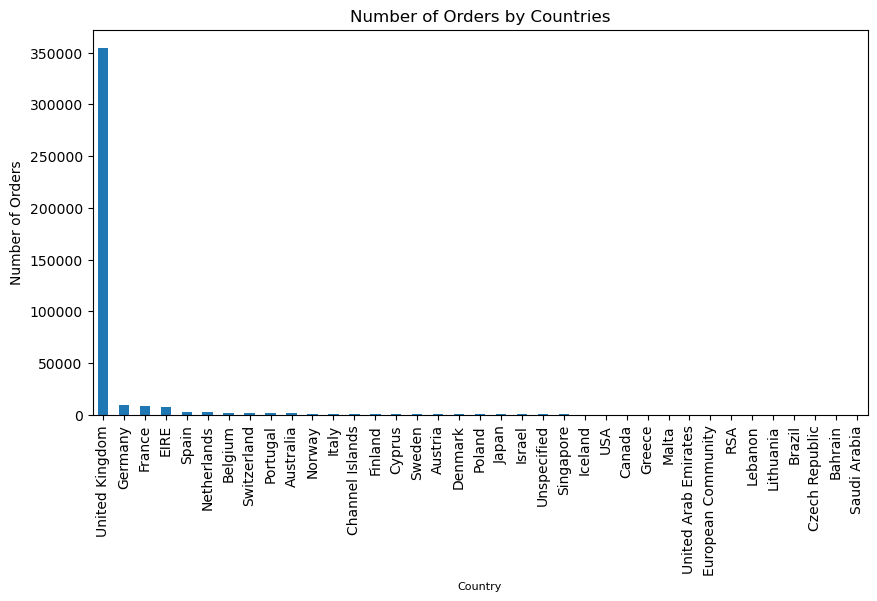

In [47]:
import matplotlib.pyplot as plt
plt.subplots(figsize=(10,5))
orders_by_country.plot(kind='bar')
plt.xlabel('Country',fontsize=8)
plt.ylabel('Number of Orders')
plt.title('Number of Orders by Countries')
plt.show()

#

In [50]:
# Total number of units/quantity sold by each country

online_retail.groupby('Country')['Quantity'].sum().sort_values(ascending=False)

Country
United Kingdom          4269472
Netherlands              200937
EIRE                     140525
Germany                  119263
France                   111472
Australia                 84209
Sweden                    36083
Switzerland               30083
Spain                     27951
Japan                     26016
Belgium                   23237
Norway                    19338
Portugal                  16122
Finland                   10704
Channel Islands            9491
Denmark                    8235
Italy                      8112
Cyprus                     6361
Singapore                  5241
Austria                    4881
Israel                     4046
Poland                     3684
Canada                     2763
Iceland                    2458
USA                        2458
Unspecified                1789
Greece                     1557
United Arab Emirates        982
Malta                       970
Czech Republic              671
Lithuania                   652


In [51]:
# creates a DataFrame of the top rows from the code above
#Useful for operations that specifically require DataFrame methods.
# Note: leaving the bracket in ".head()" blank returns only top 5, put a figure into it to return that number

pd.DataFrame(online_retail.groupby("Country")["Quantity"].sum().sort_values(ascending=False).head())

,Quantity
Country,
United Kingdom,4269472
Netherlands,200937
EIRE,140525
Germany,119263
France,111472


In [52]:
# assign a variable to the dataframe above

countries_highest_qty=pd.DataFrame(online_retail.groupby("Country")["Quantity"].sum().sort_values(ascending=False).head())

In [53]:
# reset index of the DataFrame to the default integer index range (0, 1, 2, ...) and move the current index to a new column.

countries_highest_qty.reset_index(inplace=True)
countries_highest_qty.head()

,Country,Quantity
0,United Kingdom,4269472
1,Netherlands,200937
2,EIRE,140525
3,Germany,119263
4,France,111472


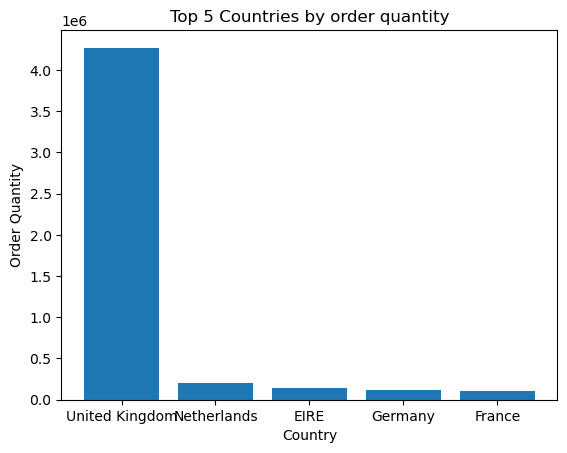

In [54]:
#visualize Top 5 Countries by order quantity

import matplotlib.pyplot as plt #Already imported above, not necessary to add again
fig = plt.figure() 
x=countries_highest_qty.Country
y=countries_highest_qty["Quantity"]
plt.bar(x, y)
plt.xlabel("Country")
plt.ylabel("Order Quantity")
plt.title("Top 5 Countries by order quantity")
plt.show()

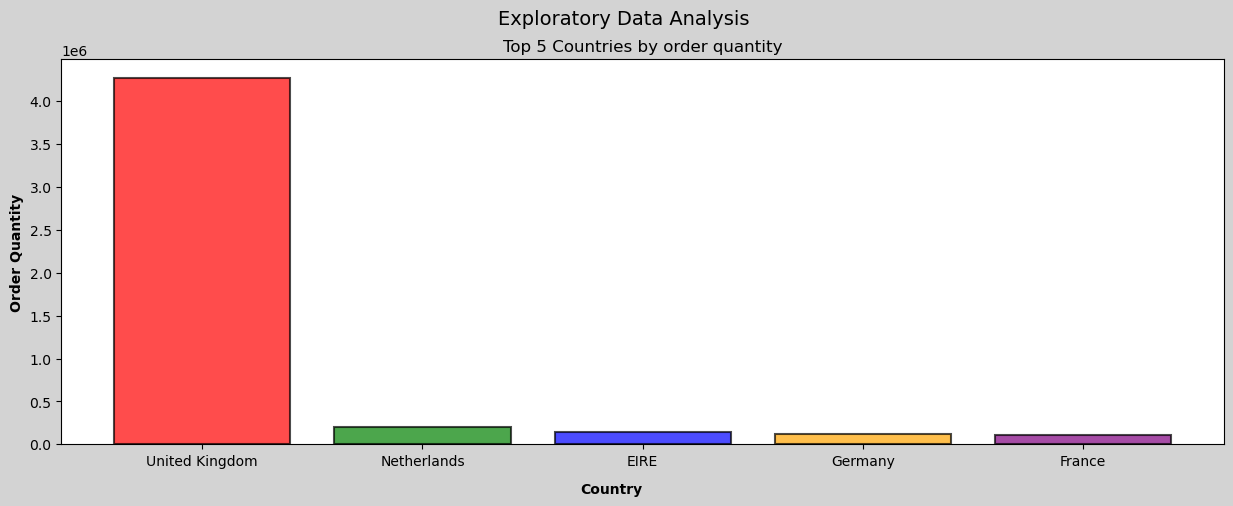

In [75]:
#Customize further 

fig = plt.figure(figsize = (15, 5))
fig.suptitle('Exploratory Data Analysis', fontsize=14) # Sets the main title of the figure
fig.patch.set_facecolor('lightgray')  # Sets the background color of the figure

x=countries_highest_qty.Country
y=countries_highest_qty["Quantity"]

# Define custom colors for bars
colors = ['red', 'green', 'blue', 'orange', 'purple']

# Create the bar plot with customizations
plt.bar(x, y, color=colors, edgecolor='black', linewidth=1.5, alpha=0.7) #alpha is transparency level from 0 to 1

plt.xlabel("Country", fontsize=10, labelpad=10, fontweight='bold', color='black', rotation=0, horizontalalignment='right', verticalalignment='top')
plt.ylabel("Order Quantity", fontweight='bold', color='black')
plt.title("Top 5 Countries by order quantity")
plt.show()

#

In [56]:
# Top Countries by Amount Spent

online_retail.groupby("Country")["AmountSpent"].sum().sort_values(ascending=False).head()

Country
United Kingdom    7308391.554
Netherlands        285446.340
EIRE               265545.900
Germany            228867.140
France             209024.050
Name: AmountSpent, dtype: float64

In [57]:
# Top customers by amount spent

online_retail.groupby("CustomerID")["AmountSpent"].sum().sort_values(ascending=False).head()

CustomerID
14646    280206.02
18102    259657.30
17450    194550.79
16446    168472.50
14911    143825.06
Name: AmountSpent, dtype: float64

In [58]:
# Least amount spent by customers

online_retail.groupby("CustomerID")["AmountSpent"].sum().sort_values(ascending=False).tail()

CustomerID
17956    12.75
16454     6.90
14792     6.20
16738     3.75
13256     0.00
Name: AmountSpent, dtype: float64

In [63]:
customer_purchasing=pd.DataFrame(online_retail.groupby("CustomerID")["AmountSpent"].sum())
customer_purchasing.head()

,AmountSpent
CustomerID,
12346,77183.60
12347,4310.00
12348,1797.24
12349,1757.55
12350,334.40


In [64]:
customer_purchasing.reset_index(inplace=True)
customer_purchasing.head()

,CustomerID,AmountSpent
0,12346,77183.60
1,12347,4310.00
2,12348,1797.24
3,12349,1757.55
4,12350,334.40


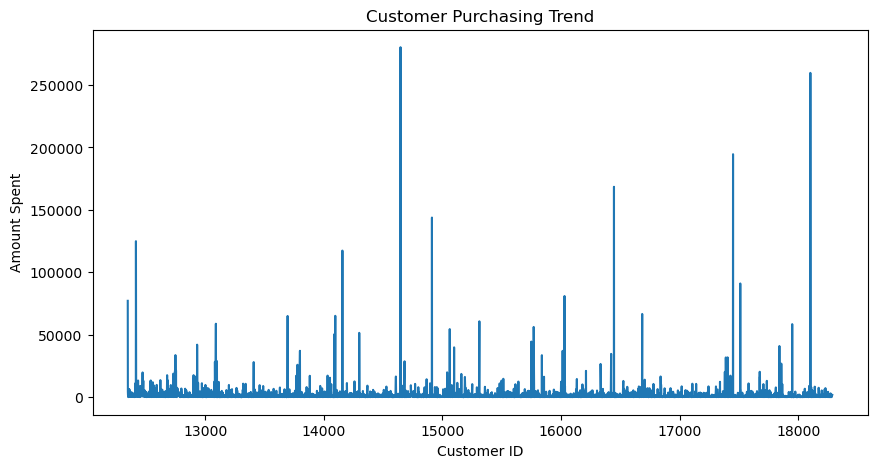

In [65]:
fig = plt.figure(figsize = (10, 5))
x=customer_purchasing.CustomerID
y=customer_purchasing["AmountSpent"]
plt.plot(x, y)
plt.xlabel("Customer ID")
plt.ylabel("Amount Spent")
plt.title("Customer Purchasing Trend")
plt.show()

In [66]:
# Top paying customers

online_retail.groupby("CustomerID").sum(numeric_only=True).sort_values(by="AmountSpent", ascending=False).head().reset_index()

,CustomerID,Quantity,UnitPrice,AmountSpent
0,14646,197491,5176.09,280206.02
1,18102,64124,1940.92,259657.30
2,17450,69993,1143.32,194550.79
3,16446,80997,4.98,168472.50
4,14911,80515,26185.72,143825.06


In [67]:
# Top paying customers

online_retail.groupby("CustomerID").sum(numeric_only=True).sort_values(by="Quantity", ascending=False).head().reset_index()

,CustomerID,Quantity,UnitPrice,AmountSpent
0,14646,197491,5176.09,280206.02
1,16446,80997,4.98,168472.50
2,14911,80515,26185.72,143825.06
3,12415,77670,2097.08,124914.53
4,12346,74215,1.04,77183.60


In [70]:
# Top selling products in each country

# Group the data by both "Country" and "Description" columns, calculate sum of quantities sold, and sort within each group
top_selling_products = online_retail.groupby(["Country", "Description"])["Quantity"].sum().reset_index()
top_selling_products = top_selling_products.sort_values(by=["Country", "Quantity"], ascending=[True, False])

# Get the top selling product in each country
top_selling_products_in_each_country = top_selling_products.groupby("Country").head(1)

print(top_selling_products_in_each_country)


                    Country                          Description  Quantity
287               Australia              MINI PAINT SET VINTAGE       2952
852                 Austria     SET 12 KIDS COLOUR  CHALK STICKS       288
919                 Bahrain           ICE CREAM SUNDAE LIP GLOSS        96
1345                Belgium      PACK OF 72 RETROSPOT CAKE CASES       480
1716                 Brazil                 DOLLY GIRL LUNCH BOX        24
1844                 Canada           RETRO COFFEE MUGS ASSORTED       504
2182        Channel Islands                         RAIN PONCHO        407
2524                 Cyprus       HEART DECORATION PAINTED ZINC        384
2850         Czech Republic   WOODEN STAR CHRISTMAS SCANDINAVIAN        72
3013                Denmark               RED  HARMONICA IN BOX        288
4264                   EIRE      PACK OF 72 RETROSPOT CAKE CASES      1632
5121     European Community       RED ROCKING HORSE HAND PAINTED        24
5227                Finla

In [71]:
# Convert "InvoiceDate" column to datetime format
online_retail['InvoiceDate'] = pd.to_datetime(online_retail['InvoiceDate'])

# Extract the year from "InvoiceDate"
online_retail['Year'] = online_retail['InvoiceDate'].dt.year

# Group the data by year and calculate total earnings for each year
yearly_earnings = online_retail.groupby('Year')['AmountSpent'].sum()

# Print the yearly breakdown of total earnings
print(yearly_earnings)


Year
2010     572713.890
2011    8338694.014
Name: AmountSpent, dtype: float64


In [72]:
# Convert "InvoiceDate" column to datetime format
online_retail['InvoiceDate'] = pd.to_datetime(online_retail['InvoiceDate'])

# Extract the month from "InvoiceDate"
online_retail['Month'] = online_retail['InvoiceDate'].dt.month

# Group the data by month and count the number of unique orders for each month
orders_by_month = online_retail.groupby('Month')['InvoiceNo'].nunique()

# Print the number of orders by month
print(orders_by_month)


Month
1      987
2      998
3     1321
4     1149
5     1555
6     1393
7     1331
8     1281
9     1756
10    1929
11    2658
12    2178
Name: InvoiceNo, dtype: int64
